In [1]:
# I cannot remember where this code came from. There are a lot of examples of 
# wine quality machine learning and this is one of them using the red wine data set
# This code needs to be checked for overfitting

In [2]:
# Import the libraries
# pandas will be used to work with file formats like csv, xls, etc.
import pandas as pd
# numpy is used for making the mathematical calculations more accurate
import numpy as np
import seaborn as sns
# sklearn (scikit-learn) will be used to import our classifier for prediction
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Read in the csv file
wine_data=pd.read_csv("winequality-red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='count'>

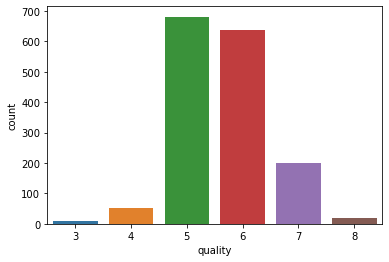

In [4]:
# graph the count of quality scores
sns.countplot(x='quality',data=wine_data)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

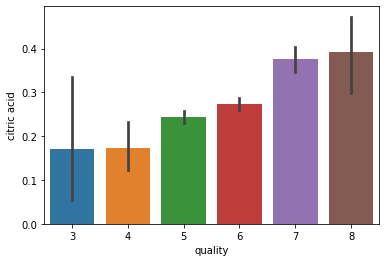

In [5]:
# plot the level of citric acid in each quality
sns.barplot(x='quality',y='citric acid',data=wine_data)

#### Now we get X as input and y as a target of data than splitting data into train and test data.

In [6]:
# split the data into train and test
X=wine_data.drop("quality",axis=1)
y=wine_data['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=51)

#### Scaling and transforming data.

In [7]:
SC=StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.fit_transform(X_test)

#### Initializing the model and fitting training data into it. Here, we use a Random forest classifier.

In [8]:
RFC= RandomForestClassifier(n_estimators=200)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Predicting data for test data.

In [9]:
y_pred = RFC.predict(X_test)

In [10]:
print(y_pred)

[5 6 6 7 6 6 5 5 5 6 6 5 5 5 5 5 5 7 5 5 5 5 5 7 5 6 6 7 5 6 6 7 6 5 5 5 6
 5 6 5 6 6 6 5 6 5 5 5 5 5 6 3 6 6 6 5 6 5 6 5 6 6 5 6 7 6 5 5 5 6 5 5 6 6
 6 6 6 5 6 6 6 7 6 7 7 6 6 5 6 6 5 5 5 6 6 5 6 5 5 5 6 6 6 6 5 6 5 5 6 6 5
 6 6 6 6 8 7 5 5 5 7 5 5 6 5 6 6 6 5 6 5 5 6 5 6 5 6 6 6 5 6 5 5 5 5 6 7 5
 5 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 6 6 6 6 6 6 6 7 5 6 6 5 6 5 6 5 6 7 6 6 6
 6 6 5 5 6 7 6 5 6 6 6 5 5 7 6 7 6 5 6 5 5 5 6 4 5 5 6 5 6 5 6 5 7 6 5 7 6
 5 5 6 6 5 7 5 5 6 6 7 6 6 5 5 6 5 5 6 5 5 5 6 6 5 5 6 6 7 6 6 5 5 7 5 7 6
 6 5 5 5 6 6 3 5 5 6 5 6 5 5 6 6 5 5 5 5 6 6 5 6 6 5 6 6 7 6 5 7 6 5 7 5 6
 6 6 6 6 6 6 5 5 5 6 6 6 6 6 6 6 6 5 6 6 7 6 5 6 6 6 6 5 6 6 5 5 7 5 6 5 5
 5 6 6 6 7 5 5 5 5 6 5 5 5 6 5 6 6 5 5 6 5 7 6 7 5 5 5 6 6 5 5 5 6 7 5 6 7
 5 6 5 5 6 6 6 5 7 6 5 5 6 6 5 6 6 6 5 6 7 5 7 5 6 6 5 5 6 7 5 6 5 6 6 5 5
 6 5 6 7 6 5 6 6 6 6 6 6 6 5 5 6 6 6 6 6 6 5 7 6 5 6 5 5 6 5 6 6 5 6 6 6 5
 5 6 5 5 5 5 5 5 5 6 6 6 6 5 6 6 6 6 6 6 7 5 5 6 6 6 5 7 6 6 6 5 6 6 5 5]


#### Finding the accuracy of the model.

In [11]:
accuracy=accuracy_score(y_test,y_pred)
print('accuracy of the model is {:.2f}% '.format(accuracy*100))

accuracy of the model is 68.96% 


In [12]:
# overfitting causes lower accuracy